In [ ]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# import Evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
# upload dataset 
df = pd.read_csv("heart dataset.csv")
df.shape

(1025, 14)

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# checking null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# checking individuals number having heart disease or not(1=No, 0=Heart)
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

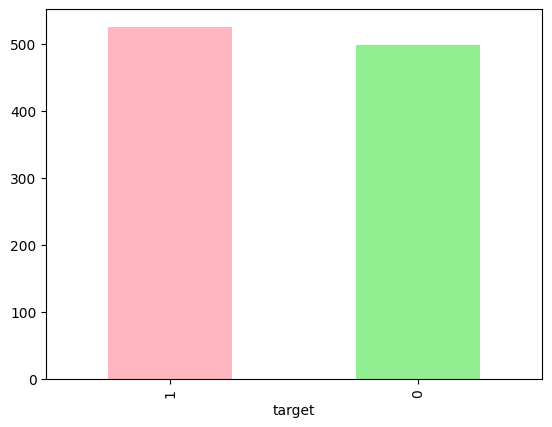

In [ ]:
# bar plot for target
df["target"].value_counts().plot(kind="bar", color=["lightpink", "lightgreen"])

In [ ]:
# checking no of male and female in dataset 
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [ ]:
# checking no of male and female having heart diseas or not
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


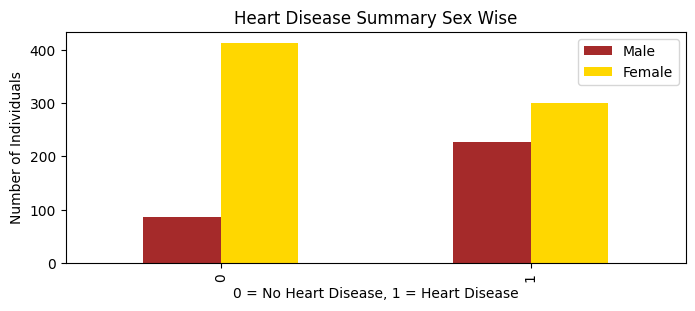

In [ ]:
# bar plot for heart disease summary sex wise
ax = pd.crosstab(df.target, df.sex).plot(figsize=(8,3),
                                         kind="bar",
                                         color=["brown", "gold"])

ax.set_title("Heart Disease Summary Sex Wise")
ax.set_xlabel("0 = No Heart Disease, 1 = Heart Disease")
ax.set_ylabel("Number of Individuals")
ax.legend(["Male", "Female"])
plt.show()

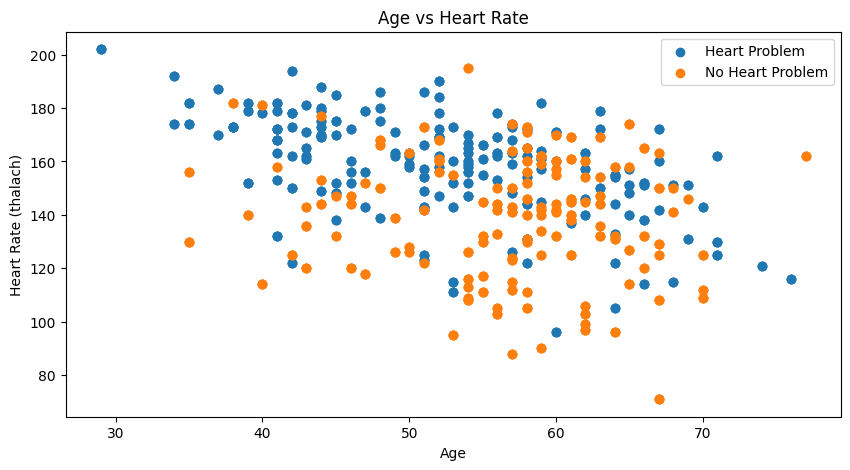

In [ ]:
# scatter plot for Age vs heart rate 
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df.age[df.target==1], df.thalach[df.target==1], label="Heart Problem")
ax.scatter(df.age[df.target==0], df.thalach[df.target==0], label="No Heart Problem")
ax.set_title("Age vs Heart Rate")
ax.set_xlabel("Age")
ax.set_ylabel("Heart Rate (thalach)")
ax.legend()
plt.show()

<Axes: ylabel='Frequency'>

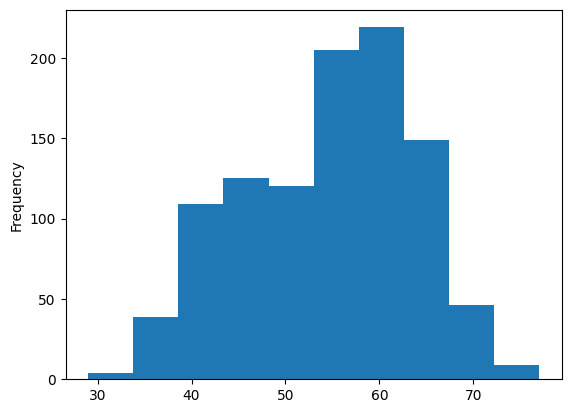

In [ ]:
# histogram for age
df.age.plot.hist()

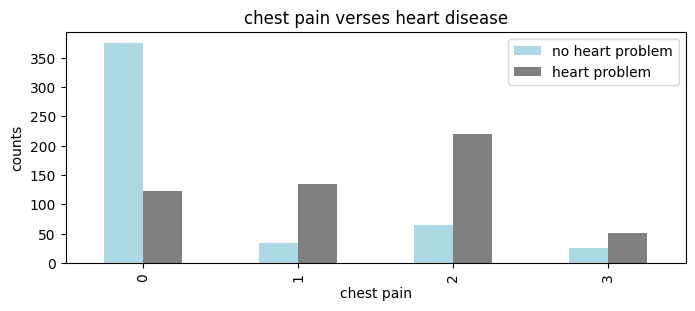

In [ ]:
# bar plot for chest pain verses heart disease
ax = pd.crosstab(df.cp, df.target).plot(figsize=(8,3),
                                         kind="bar",
                                         color=["lightblue", "grey"])
ax.set_title("chest pain verses heart disease")
ax.set_xlabel("chest pain")
ax.set_ylabel("counts")
ax.legend(["no heart problem", "heart problem"])
plt.show()

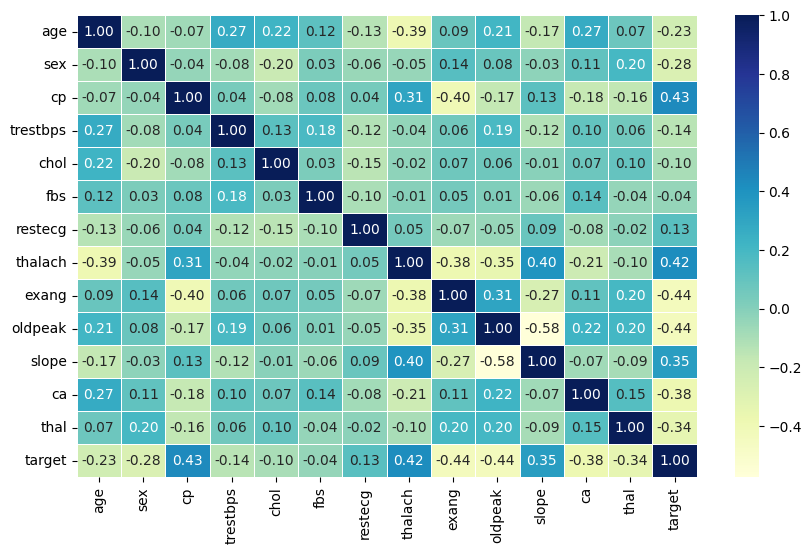

In [17]:
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,6))
room=sns.heatmap(cor_map,annot=True, linewidths=0.5, fmt="0.2f", cmap="YlGnBu")

In [18]:
# split data
x = df.drop("target", axis=1)
y = df["target"]
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
# scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
# score
knn_score = knn.score(x_test_scaled, y_test)
print("accuracy of KNN: ", knn_score)

accuracy of KNN:  0.848780487804878


In [25]:
y_pred_knn = knn.predict(x_test_scaled)
print("KNN Metrics")
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

KNN Metrics
Precision: 0.8632478632478633
Recall: 0.8706896551724138
F1 Score: 0.8669527896995708

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        89
           1       0.86      0.87      0.87       116

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



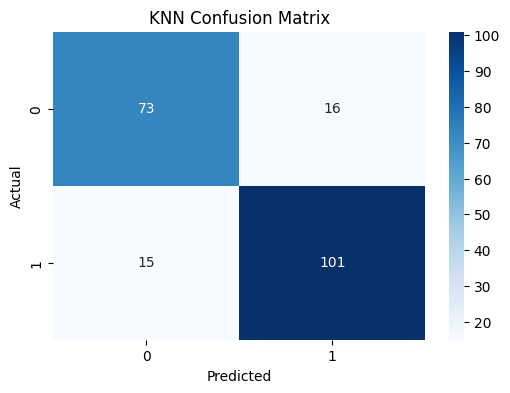

In [26]:
y_pred_knn = knn.predict(x_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
# logistic regression
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train_scaled, y_train)
lr_score = lr.score(x_test_scaled, y_test)
print("Accuracy of Logistic regression: ", lr_score)

Accuracy of Logistic regression:  0.8682926829268293


In [62]:
y_pred_lr = lr.predict(x_test_scaled)
print("Logistic Regression Metrics")
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Metrics
Precision: 0.8938053097345132
Recall: 0.8706896551724138
F1 Score: 0.8820960698689956

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        89
           1       0.89      0.87      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



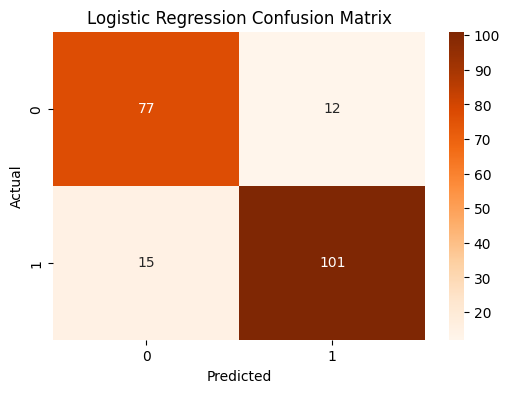

In [63]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()